# Pymaceuticals Inc.
---

### Analysis

There is a high positive correlation between a mouse's weight and tumor size for the Capomulin drug. It also appears that Capomulin and Ramicane had lower final tumor volumes than Infubinol and Ceftamin, although this does not normalize by weight. There was a fairly even distribution of male and female mice in the study, 51% and 49% respectively. Lastly, there were a minimal amount of duplciated results as it only affected one mouse.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_results = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
combined_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
combined_results['Mouse ID'].nunique()

#249 mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_results[combined_results.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice = duplicates['Mouse ID'].unique()

duplicate_mice
# array(['g989'], dtype=object)

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = combined_results[combined_results['Mouse ID'] == duplicate_mice[0]]
duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_results = combined_results[combined_results['Mouse ID'] != duplicate_mice[0]]
cleaned_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_results['Mouse ID'].nunique()

#248

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_groups = cleaned_results.set_index(['Drug Regimen'])

mean_tumor_volume = drug_groups.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
median_tumor_volume = drug_groups.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
var_tumor_volume = drug_groups.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
std_tumor_volume = drug_groups.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
sem_tumor_volume = drug_groups.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

tumor_volume_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                                'Median Tumor Volume': median_tumor_volume,
                                'Tumor Volume Variance': var_tumor_volume,
                                'Tumor Volume Std. Dev.': std_tumor_volume,
                                'Tumor Volume Std. Err.': sem_tumor_volume
                                })

tumor_volume_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

cleaned_results.groupby(['Drug Regimen']).aggregate({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

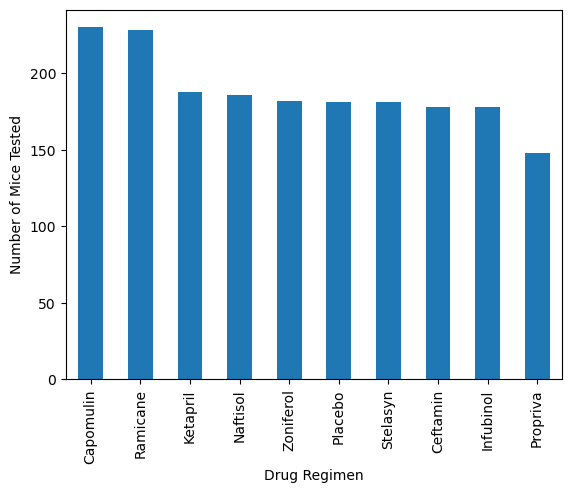

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count_by_drug = cleaned_results.groupby('Drug Regimen').count()['Mouse ID']

bar_chart = mouse_count_by_drug.sort_values(ascending=False).plot(kind='bar')
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel("Number of Mice Tested")

plt.show()

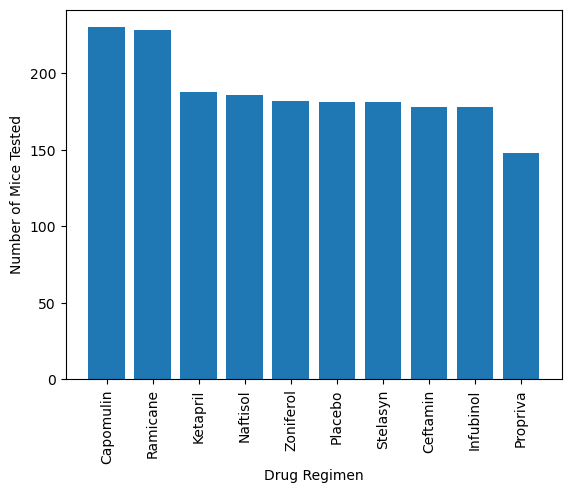

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_count_by_drug = mouse_count_by_drug.sort_values(ascending=False)

plt.bar(mouse_count_by_drug.index, mouse_count_by_drug)

plt.xlabel('Drug Regimen')
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)

plt.show()


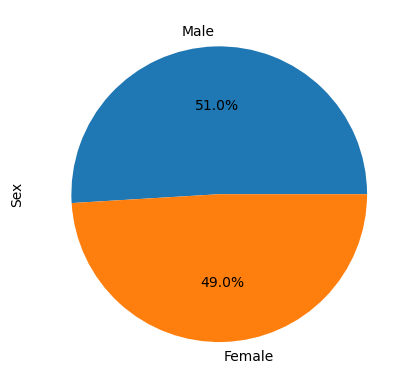

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_count_by_gender = cleaned_results.groupby('Sex').count()['Mouse ID']

mouse_count_by_gender = mouse_count_by_gender.sort_values(ascending=False)

mouse_count_by_gender.plot.pie(y='Sex', autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

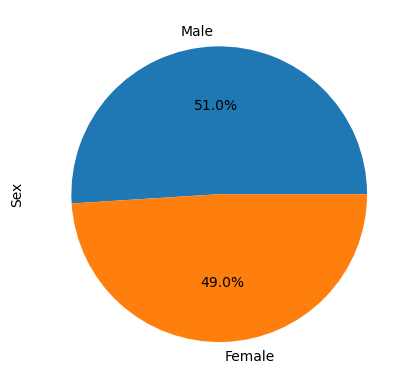

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_mice = mouse_count_by_gender.sum()

pie_percentages = [round((x / total_mice * 100), 1) for x in mouse_count_by_gender]
labels = mouse_count_by_gender.index

plt.pie(pie_percentages, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

cleaned_timepoint_df = pd.DataFrame({'Mouse ID': cleaned_results['Mouse ID'],
                        'Drug Regimen': cleaned_results['Drug Regimen'],
                        'Timepoint': cleaned_results['Timepoint']})

max_timepoint_df = pd.DataFrame(cleaned_timepoint_df[['Mouse ID', 'Drug Regimen', 'Timepoint']].groupby(['Mouse ID', 'Drug Regimen']).max()['Timepoint'])

max_timepoint_df.reset_index(inplace=True)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_max_df = pd.merge(max_timepoint_df, cleaned_results, on=['Mouse ID', 'Timepoint'], suffixes=('', '_y')).filter(regex='^(?!.*_y)')


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Locate the rows which contain mice on each drug and get the tumor volumes


for drug in drug_list:

    data = merged_max_df.loc[merged_max_df['Drug Regimen'] == drug, ['Drug Regimen', 'Tumor Volume (mm3)']]  
    data = data.set_index('Drug Regimen')
    tumor_vol_data.append(data)
    

    
# Calculate the IQR and quantitatively determine if there are any potential outliers.    
for series in tumor_vol_data:
    
    tumor_outliers = []

    tumor_quartiles = series['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    tumor_lowerq = tumor_quartiles[0.25]
    tumor_upperq = tumor_quartiles[0.75]
    tumor_iqr = tumor_upperq-tumor_lowerq

    tumor_lower_bound = tumor_lowerq - (1.5*tumor_iqr)
    tumor_upper_bound = tumor_upperq + (1.5*tumor_iqr)

    for r in series['Tumor Volume (mm3)']:
        if((r < tumor_lower_bound) or r > (tumor_upper_bound)):
            tumor_outliers.append([series['Tumor Volume (mm3)'].index[0], r])
    
    print(f"{series.index[0]} has an IQR of {round(tumor_iqr, 4)}. Potential outliers: {tumor_outliers}")

    
# add subset 





Capomulin has an IQR of 7.7819. Potential outliers: []
Ramicane has an IQR of 9.0985. Potential outliers: []
Infubinol has an IQR of 11.4771. Potential outliers: [['Infubinol', 36.3213458]]
Ceftamin has an IQR of 15.5778. Potential outliers: []


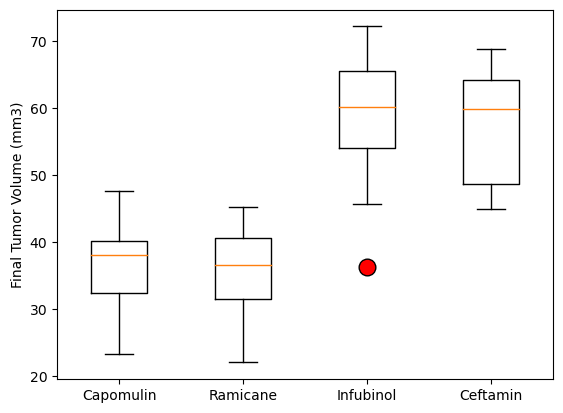

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
filtered_tumor_volume_list = []

for i in tumor_vol_data:    
    filtered_tumor_volume_list.append(i['Tumor Volume (mm3)'])

flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='black')
plt.boxplot(filtered_tumor_volume_list, labels=drug_list, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

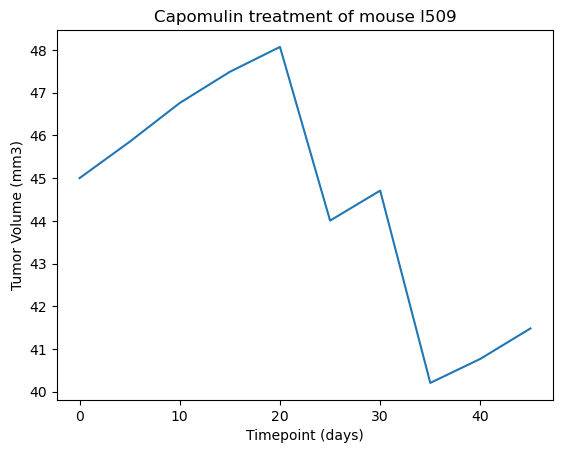

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cleaned_results.loc[cleaned_results['Mouse ID'] == 'l509', :]

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

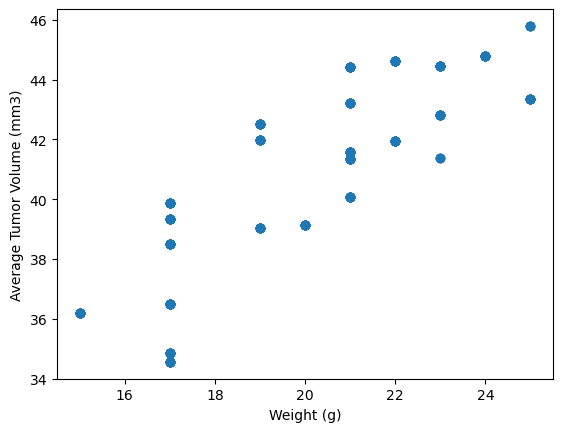

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice = cleaned_results.loc[(cleaned_results['Drug Regimen'] == 'Capomulin'), :]

average_tumor = pd.DataFrame()

average_tumor['Average Tumor Size'] = mice.groupby(['Mouse ID']).aggregate({'Tumor Volume (mm3)':['mean']})

avg_tumor_weight = pd.merge(mice, average_tumor, on=['Mouse ID'])

weight = avg_tumor_weight['Weight (g)']
tumor = avg_tumor_weight['Average Tumor Size']

plt.scatter(weight, tumor)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


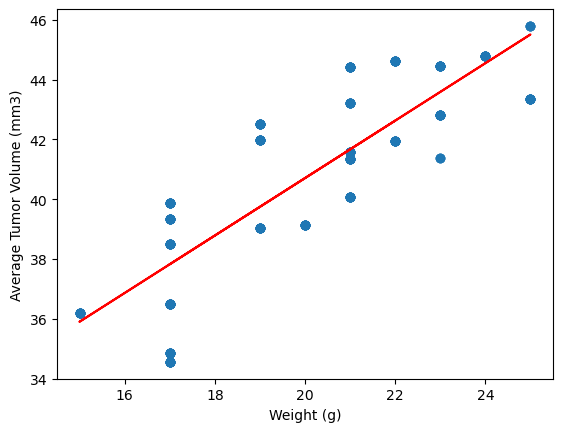

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor)

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tumor)[0], 2)}")

regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(weight,tumor)
plt.plot(weight,regress_values,"r-")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()
